In [3]:
import os
import json
import requests
import pandas as pd
import time
import gmaps

from matplotlib.ticker import StrMethodFormatter
import matplotlib.pyplot as plt

In [4]:
file_path = "Top_100_Contractors_Report_Fiscal_Year_2019.xls"
procurement_data = pd.read_excel(file_path, sheet_name = None)
procurement_data


{'Federal':                         Global Vendor Name  Number of Actions  \
 0              LOCKHEED MARTIN CORPORATION              58430   
 1                      BOEING COMPANY, THE              18765   
 2             GENERAL DYNAMICS CORPORATION              17136   
 3                         RAYTHEON COMPANY              12662   
 4             NORTHROP GRUMMAN CORPORATION              12984   
 ..                                     ...                ...   
 95                    GOVERNMENT OF CANADA               2143   
 96                    GEO GROUP, INC., THE                379   
 97               INSIGHT ENTERPRISES  INC.               1231   
 98         UNITEDHEALTH GROUP INCORPORATED                293   
 99  WORLD WIDE TECHNOLOGY HOLDING CO., LLC               1842   
 
     Dollars Obligated  %Total Actions  %Total Dollars  
 0        4.866580e+10        0.000777        0.082314  
 1        2.808870e+10        0.000250        0.047510  
 2        2.096105e+10  

In [5]:
federal_vendor_names = procurement_data["Federal"][["Global Vendor Name", "Dollars Obligated"]]
federal_vendor_names = federal_vendor_names.rename({"Global Vendor Name": "Business Name"}, axis=1)
federal_vendor_names

,Business Name,Dollars Obligated
0,LOCKHEED MARTIN CORPORATION,4.866580e+10
1,"BOEING COMPANY, THE",2.808870e+10
2,GENERAL DYNAMICS CORPORATION,2.096105e+10
3,RAYTHEON COMPANY,1.635078e+10
4,NORTHROP GRUMMAN CORPORATION,1.610125e+10
...,...,...
95,GOVERNMENT OF CANADA,6.115669e+08
96,"GEO GROUP, INC., THE",6.073432e+08
97,INSIGHT ENTERPRISES INC.,5.870121e+08
98,UNITEDHEALTH GROUP INCORPORATED,5.739703e+08


In [6]:
federal_overview = pd.read_csv("federal_overview.csv")
federal_overview.head()


,Unnamed: 0,Business Name,Address,City,State,Zip,Country,Number of Actions,Dollars Obligated,Per Capita Spending,Range of Actions,Lat,Lon,Cong. Dis.,Senator 1,Senator 2,Representative,Party 1,Party 2,Party 3
0,0,LOCKHEED MARTIN CORPORATION,700 N FREDERICK AVE,GAITHERSBURG,MD,20879,USA,58430,4.866580e+10,832890.58,"10,000-99,999",39.143969,-77.201606,6.0,Ben Cardin (D),Chris Van Hollen (D),David Trone (D),D,D,D
1,1,"BOEING COMPANY, THE",3373 BRECKINRIDGE BLVD,RICHARDSON,TX,75082,USA,18765,2.808870e+10,1496866.72,"10,000-99,999",32.948334,-96.729852,3.0,John Cornyn (R),Ted Cruz (R),Van Taylor (R),R,R,R
2,2,RAYTHEON COMPANY,5001 US HIGHWAY 30 W,FORT WAYNE,IN,46818,USA,12662,1.635078e+10,1291326.96,"10,000-99,999",41.079273,-85.139351,3.0,Todd Young (R),Mike Braun (R),Jim Banks (R),R,R,R
3,3,MCKESSON CORPORATION,6555 STATE HIGHWAY 161,IRVING,TX,75039,USA,82167,9.640425e+09,117327.21,"10,000-99,999",32.814018,-96.948894,24.0,John Cornyn (R),Ted Cruz (R),Kenny Marchant (R),R,R,R
4,4,"LEIDOS HOLDINGS, INC.",1750 PRESIDENTS ST,RESTON,VA,20190,USA,4830,7.272381e+09,1505669.05,"1,000-9,999",38.958631,-77.357003,11.0,Mark Warner (D),Tim Kaine (D),Gerry Connolly (D),D,D,D


In [7]:
top20_vendors = federal_overview.nlargest(20, 'Dollars Obligated')
top20_vendors


,Unnamed: 0,Business Name,Address,City,State,Zip,Country,Number of Actions,Dollars Obligated,Per Capita Spending,Range of Actions,Lat,Lon,Cong. Dis.,Senator 1,Senator 2,Representative,Party 1,Party 2,Party 3
0,0,LOCKHEED MARTIN CORPORATION,700 N FREDERICK AVE,GAITHERSBURG,MD,20879,USA,58430,4.866580e+10,832890.58,"10,000-99,999",39.143969,-77.201606,6.0,Ben Cardin (D),Chris Van Hollen (D),David Trone (D),D,D,D
1,1,"BOEING COMPANY, THE",3373 BRECKINRIDGE BLVD,RICHARDSON,TX,75082,USA,18765,2.808870e+10,1496866.72,"10,000-99,999",32.948334,-96.729852,3.0,John Cornyn (R),Ted Cruz (R),Van Taylor (R),R,R,R
16,16,GENERAL DYNAMICS CORPORATION,2941 FAIRVIEW PARK DR STE 100,FALLS CHURCH,VA,22042,USA,17136,2.096105e+10,1223217.36,"10,000-99,999",38.882334,-77.171091,8.0,Mark Warner (D),Tim Kaine (D),Don Beyer (D),D,D,D
2,2,RAYTHEON COMPANY,5001 US HIGHWAY 30 W,FORT WAYNE,IN,46818,USA,12662,1.635078e+10,1291326.96,"10,000-99,999",41.079273,-85.139351,3.0,Todd Young (R),Mike Braun (R),Jim Banks (R),R,R,R
3,3,MCKESSON CORPORATION,6555 STATE HIGHWAY 161,IRVING,TX,75039,USA,82167,9.640425e+09,117327.21,"10,000-99,999",32.814018,-96.948894,24.0,John Cornyn (R),Ted Cruz (R),Kenny Marchant (R),R,R,R
15,15,UNITED TECHNOLOGIES CORPORATION,411 SILVER LN,EAST HARTFORD,CT,06118,USA,16446,8.849258e+09,538079.68,"10,000-99,999",41.763422,-72.612834,1.0,Richard Blumenthal (D),Chris Murphy (D),John Larson (D),D,D,D
4,4,"LEIDOS HOLDINGS, INC.",1750 PRESIDENTS ST,RESTON,VA,20190,USA,4830,7.272381e+09,1505669.05,"1,000-9,999",38.958631,-77.357003,11.0,Mark Warner (D),Tim Kaine (D),Gerry Connolly (D),D,D,D
17,17,"L3HARRIS TECHNOLOGIES, INC.",1781 S MURRAY BLVD,COLORADO SPRINGS,CO,80916,USA,8872,6.877550e+09,775197.27,"1,000-9,999",38.833882,-104.821363,5.0,Michael Bennet (D),Cory Gardner (R),Doug Lamborn (R),D,R,R
18,18,HONEYWELL INTERNATIONAL INC.,13051 66TH,LARGO,FL,33773,USA,10186,6.364733e+09,624851.06,"10,000-99,999",27.909466,-82.787324,13.0,Marco Rubio (R),Rick Scott (R),Charlie Crist (D),R,R,D
5,5,FLUOR CORPORATION,6700 LAS COLINAS BLVD,IRVING,TX,75039,USA,364,5.254247e+09,14434744.08,"Under 1,000",32.814018,-96.948894,24.0,John Cornyn (R),Ted Cruz (R),Kenny Marchant (R),R,R,R


In [8]:
top20_vendors["Dollars Obligated"].max()

48665796759.96

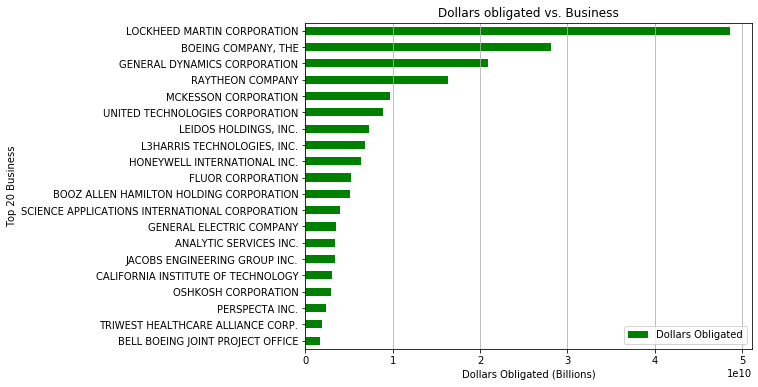

In [9]:
ax = top20_vendors.plot.barh("Business Name", "Dollars Obligated",
                             color = 'g', alpha= 1, align= 'center', figsize=(8,6))
plt.gca().invert_yaxis()
plt.title("Dollars obligated vs. Business")
plt.xlabel("Dollars Obligated (Billions)")
plt.ylabel("Top 20 Business")
plt.grid(axis = 'x')
plt.savefig('Dollars obligated by Business.png')
plt.show()


In [10]:
top20_vendors["Per Capita Spending"].max()

14434744.08

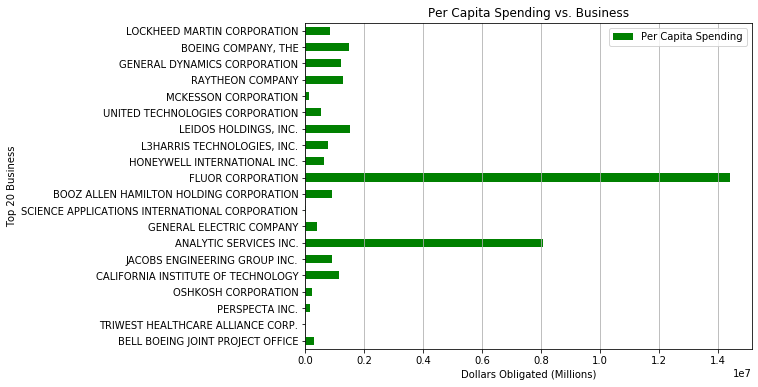

In [11]:
ax = top20_vendors.plot.barh("Business Name", "Per Capita Spending",
                             color = 'g', alpha= 1, align= 'center', figsize= (8,6))
plt.gca().invert_yaxis()
plt.title("Per Capita Spending vs. Business")
plt.xlabel("Dollars Obligated (Millions)")
plt.ylabel("Top 20 Business")
plt.grid(axis = 'x')
plt.savefig('Per Capita Spending by Business.png')
plt.show()
